In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

from Generation import *
from Calculations import *
from SSWM import *

In [2]:
#Set initial parameters
M, N, K = 50, 80, 10
coefLambda, coefC, coefBeta = 1.1, 1.1, 0.85
h = K/3 #0 < h < K/2
p_mut = 1/N
T_stop = 500
N_pop = 1 # Only one boolean vector

In [3]:
W,B,C = generateWBC(N,M,K)

--------------DEBUG---------------
Average non-zero: 10.15
Weights M vector for M traits:  [ 9 15  5 11  6 17 13  7  9 12  8 13  7  7 12  8  8 15  7  8  3 11  5  9
 11  8 17 10  8  6 10 13 13 11 11  8 12 15 13  7  3  6  8 10 13 13  8 17
 11 11 10 15  7 11 10 10 12 15  4 12 13 15 10  6  6  9 11 14 10 14  7  4
 12 19 13 13 10  6  5 11]


In [4]:
print("Matrix W:\n", W)
print("Matrix B:\n", B)
print("Vector C:\n", C)

Matrix W:
 [[ 0  0 -1 ...  0  0  1]
 [-1  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  1]]
Matrix B:
 [[2.92294519 9.75379072 2.07474313 ... 1.53362228 5.30937755 4.61204898]
 [9.75379072 7.74148756 4.92313637 ... 9.17012431 1.68688845 3.20085905]
 [2.07474313 4.92313637 4.75467244 ... 5.5668573  1.04337464 8.80940421]
 ...
 [1.53362228 9.17012431 5.5668573  ... 3.99335325 1.87337685 5.83871045]
 [5.30937755 1.68688845 1.04337464 ... 1.87337685 6.7691452  2.96319588]
 [4.61204898 3.20085905 8.80940421 ... 5.83871045 2.96319588 5.5866312 ]]
Vector C:
 [3.59983055 3.39385729 1.265088   1.49344228 3.55870071 3.7751265
 4.90409562 9.58625675 7.50823168 2.47684646 4.92160847 9.05260703
 9.33187351 4.24726811 5.2956184  4.34383614 5.21661166 4.09260537
 5.34625023 1.09255633 9.10586439 3.52382756 2.69769437 2.83051227
 1.83585718 8.43291682 8.37698818 2.58488313 8.05676521 9.19753339
 4.23432236 8.09299525 7.85642064

------DEBUG-----
Initial F - 5.7795750806719635e+165


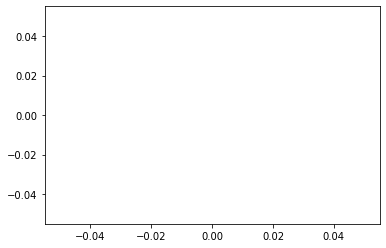

In [5]:
vals = SSWM(M, N, K, coefLambda, coefC, coefBeta, h, p_mut, T_stop, N_pop, W, B, C)

In [6]:
vals

(0.027018460623732088, -3.3695864541926577, [])